In [ ]:
#Dependencies
!pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python mediapipe sklearn matplotlib

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

ModuleNotFoundError: No module named 'cv2'

In [3]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction using Mediapipe
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [4]:
#For simple Landmarks
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [5]:
#For more Reformed Landmarks
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=2), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=2), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [19]:
draw_landmarks(frame, results)

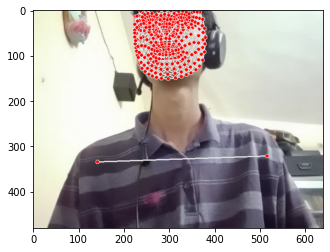

In [21]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [9]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [10]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [11]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)


In [12]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [13]:
result_test = extract_keypoints(results)

In [14]:
result_test

array([ 0.57469505,  0.42025933, -0.8005718 , ...,  0.        ,
        0.        ,  0.        ])

In [15]:
np.save('0', result_test) #Save Np Data

In [16]:
np.load('0.npy') #Load Np Data

array([ 0.57469505,  0.42025933, -0.8005718 , ...,  0.        ,
        0.        ,  0.        ])

In [17]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['Assalam-o-alikum', 'alright', 'Hello'])

# Thirty videos worth of data
no_sequences = 15

# Videos are going to be 30 frames in length
sequence_length = 15

In [18]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [19]:
#Press q to access forward
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(20)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(2) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [ ]:
#cap.release() Only use if the camera is not responding
#cv2.destroyAllWindows()

In [20]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [21]:
label_map = {label:num for num, label in enumerate(actions)}

In [22]:
label_map

{'Assalam-o-alikum': 0, 'alright': 1, 'Hello': 2}

In [23]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [24]:
np.array(sequences).shape

(45, 15, 1662)

In [25]:
np.array(labels).shape

(45,)

In [26]:
X = np.array(sequences)

In [27]:
X.shape

(45, 15, 1662)

In [28]:
y = to_categorical(labels).astype(int)

In [29]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1]])

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [31]:
y_test.shape

(3, 3)

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [40]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [56]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(15,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [57]:
res = [.7, 0.2, 0.1]

In [58]:
actions[np.argmax(res)]

'Assalam-o-alikum'

In [59]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [60]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
2/2 [==============================] - 6s 1s/step - loss: 1.0970 - categorical_accuracy: 0.3576
Epoch 2/2000
2/2 [==============================] - 0s 78ms/step - loss: 1.1079 - categorical_accuracy: 0.3160
Epoch 3/2000
2/2 [==============================] - 0s 60ms/step - loss: 1.1180 - categorical_accuracy: 0.3264
Epoch 4/2000
2/2 [==============================] - 0s 58ms/step - loss: 1.1285 - categorical_accuracy: 0.3056
Epoch 5/2000
2/2 [==============================] - 0s 62ms/step - loss: 1.1191 - categorical_accuracy: 0.3056
Epoch 6/2000
2/2 [==============================] - 0s 50ms/step - loss: 1.1023 - categorical_accuracy: 0.3160
Epoch 7/2000
2/2 [==============================] - 0s 60ms/step - loss: 1.0960 - categorical_accuracy: 0.3160
Epoch 8/2000
2/2 [==============================] - 0s 70ms/step - loss: 1.0611 - categorical_accuracy: 0.3264
Epoch 9/2000
2/2 [==============================] - 0s 70ms/step - loss: 0.9974 - categorical_accuracy: 0.3576
Epo

2/2 [==============================] - 0s 60ms/step - loss: 3.8334e-05 - categorical_accuracy: 1.0000
Epoch 146/2000
2/2 [==============================] - 0s 70ms/step - loss: 3.7243e-05 - categorical_accuracy: 1.0000
Epoch 147/2000
2/2 [==============================] - 0s 71ms/step - loss: 3.1862e-05 - categorical_accuracy: 1.0000
Epoch 148/2000
2/2 [==============================] - 0s 60ms/step - loss: 3.7072e-05 - categorical_accuracy: 1.0000
Epoch 149/2000
2/2 [==============================] - 0s 50ms/step - loss: 3.6266e-05 - categorical_accuracy: 1.0000
Epoch 150/2000
2/2 [==============================] - 0s 55ms/step - loss: 3.5466e-05 - categorical_accuracy: 1.0000
Epoch 151/2000
2/2 [==============================] - 0s 50ms/step - loss: 3.0866e-05 - categorical_accuracy: 1.0000
Epoch 152/2000
2/2 [==============================] - 0s 55ms/step - loss: 3.3915e-05 - categorical_accuracy: 1.0000
Epoch 153/2000
2/2 [==============================] - 0s 65ms/step - loss: 3.23

2/2 [==============================] - 0s 51ms/step - loss: 7.1953e-06 - categorical_accuracy: 1.0000
Epoch 284/2000
2/2 [==============================] - 0s 50ms/step - loss: 6.8378e-06 - categorical_accuracy: 1.0000
Epoch 285/2000
2/2 [==============================] - 0s 50ms/step - loss: 6.2698e-06 - categorical_accuracy: 1.0000
Epoch 286/2000
2/2 [==============================] - 0s 40ms/step - loss: 6.1917e-06 - categorical_accuracy: 1.0000
Epoch 287/2000
2/2 [==============================] - 0s 45ms/step - loss: 5.9516e-06 - categorical_accuracy: 1.0000
Epoch 288/2000
2/2 [==============================] - 0s 46ms/step - loss: 5.9638e-06 - categorical_accuracy: 1.0000
Epoch 289/2000
2/2 [==============================] - 0s 60ms/step - loss: 5.7778e-06 - categorical_accuracy: 1.0000
Epoch 290/2000
2/2 [==============================] - 0s 50ms/step - loss: 4.5491e-06 - categorical_accuracy: 1.0000
Epoch 291/2000
2/2 [==============================] - 0s 50ms/step - loss: 5.13

2/2 [==============================] - 0s 50ms/step - loss: 2.3008e-07 - categorical_accuracy: 1.0000
Epoch 422/2000
2/2 [==============================] - 0s 50ms/step - loss: 2.2322e-07 - categorical_accuracy: 1.0000
Epoch 423/2000
2/2 [==============================] - 0s 40ms/step - loss: 2.3191e-07 - categorical_accuracy: 1.0000
Epoch 424/2000
2/2 [==============================] - 0s 50ms/step - loss: 1.6232e-07 - categorical_accuracy: 1.0000
Epoch 425/2000
2/2 [==============================] - 0s 57ms/step - loss: 2.1695e-07 - categorical_accuracy: 1.0000
Epoch 426/2000
2/2 [==============================] - 0s 50ms/step - loss: 1.5918e-07 - categorical_accuracy: 1.0000
Epoch 427/2000
2/2 [==============================] - 0s 50ms/step - loss: 2.1630e-07 - categorical_accuracy: 1.0000
Epoch 428/2000
2/2 [==============================] - 0s 50ms/step - loss: 1.4919e-07 - categorical_accuracy: 1.0000
Epoch 429/2000
2/2 [==============================] - 0s 50ms/step - loss: 2.15

2/2 [==============================] - 0s 40ms/step - loss: 4.6596e-08 - categorical_accuracy: 1.0000
Epoch 562/2000
2/2 [==============================] - 0s 50ms/step - loss: 4.6596e-08 - categorical_accuracy: 1.0000
Epoch 563/2000
2/2 [==============================] - 0s 45ms/step - loss: 6.7706e-08 - categorical_accuracy: 1.0000
Epoch 564/2000
2/2 [==============================] - 0s 40ms/step - loss: 6.7706e-08 - categorical_accuracy: 1.0000
Epoch 565/2000
2/2 [==============================] - 0s 55ms/step - loss: 6.8947e-08 - categorical_accuracy: 1.0000
Epoch 566/2000
2/2 [==============================] - 0s 50ms/step - loss: 4.6596e-08 - categorical_accuracy: 1.0000
Epoch 567/2000
2/2 [==============================] - 0s 50ms/step - loss: 6.4572e-08 - categorical_accuracy: 1.0000
Epoch 568/2000
2/2 [==============================] - 0s 40ms/step - loss: 6.0846e-08 - categorical_accuracy: 1.0000
Epoch 569/2000
2/2 [==============================] - 0s 55ms/step - loss: 6.58

2/2 [==============================] - 0s 50ms/step - loss: 2.8206e-08 - categorical_accuracy: 1.0000
Epoch 702/2000
2/2 [==============================] - 0s 50ms/step - loss: 1.7030e-08 - categorical_accuracy: 1.0000
Epoch 703/2000
2/2 [==============================] - 0s 50ms/step - loss: 2.8206e-08 - categorical_accuracy: 1.0000
Epoch 704/2000
2/2 [==============================] - 0s 40ms/step - loss: 2.5072e-08 - categorical_accuracy: 1.0000
Epoch 705/2000
2/2 [==============================] - 0s 40ms/step - loss: 2.5072e-08 - categorical_accuracy: 1.0000
Epoch 706/2000
2/2 [==============================] - 0s 40ms/step - loss: 2.5072e-08 - categorical_accuracy: 1.0000
Epoch 707/2000
2/2 [==============================] - 0s 40ms/step - loss: 2.5072e-08 - categorical_accuracy: 1.0000
Epoch 708/2000
2/2 [==============================] - 0s 50ms/step - loss: 2.5072e-08 - categorical_accuracy: 1.0000
Epoch 709/2000
2/2 [==============================] - 0s 50ms/step - loss: 2.50

2/2 [==============================] - 0s 45ms/step - loss: 1.5670e-08 - categorical_accuracy: 1.0000
Epoch 842/2000
2/2 [==============================] - 0s 50ms/step - loss: 1.5670e-08 - categorical_accuracy: 1.0000
Epoch 843/2000
2/2 [==============================] - 0s 55ms/step - loss: 9.4611e-09 - categorical_accuracy: 1.0000
Epoch 844/2000
2/2 [==============================] - 0s 50ms/step - loss: 1.5670e-08 - categorical_accuracy: 1.0000
Epoch 845/2000
2/2 [==============================] - 0s 50ms/step - loss: 1.5670e-08 - categorical_accuracy: 1.0000
Epoch 846/2000
2/2 [==============================] - 0s 50ms/step - loss: 1.5670e-08 - categorical_accuracy: 1.0000
Epoch 847/2000
2/2 [==============================] - 0s 50ms/step - loss: 9.4611e-09 - categorical_accuracy: 1.0000
Epoch 848/2000
2/2 [==============================] - 0s 50ms/step - loss: 1.5670e-08 - categorical_accuracy: 1.0000
Epoch 849/2000
2/2 [==============================] - 0s 45ms/step - loss: 9.46

2/2 [==============================] - 0s 50ms/step - loss: 9.4019e-09 - categorical_accuracy: 1.0000
Epoch 981/2000
2/2 [==============================] - 0s 50ms/step - loss: 9.4019e-09 - categorical_accuracy: 1.0000
Epoch 982/2000
2/2 [==============================] - 0s 40ms/step - loss: 5.6766e-09 - categorical_accuracy: 1.0000
Epoch 983/2000
2/2 [==============================] - 0s 50ms/step - loss: 9.4019e-09 - categorical_accuracy: 1.0000
Epoch 984/2000
2/2 [==============================] - 0s 50ms/step - loss: 9.4019e-09 - categorical_accuracy: 1.0000
Epoch 985/2000
2/2 [==============================] - 0s 50ms/step - loss: 9.4019e-09 - categorical_accuracy: 1.0000
Epoch 986/2000
2/2 [==============================] - 0s 45ms/step - loss: 9.4019e-09 - categorical_accuracy: 1.0000
Epoch 987/2000
2/2 [==============================] - 0s 50ms/step - loss: 9.4019e-09 - categorical_accuracy: 1.0000
Epoch 988/2000
2/2 [==============================] - 0s 50ms/step - loss: 9.40

2/2 [==============================] - 0s 50ms/step - loss: 3.7844e-09 - categorical_accuracy: 1.0000
Epoch 1119/2000
2/2 [==============================] - 0s 40ms/step - loss: 6.2679e-09 - categorical_accuracy: 1.0000
Epoch 1120/2000
2/2 [==============================] - 0s 50ms/step - loss: 6.2679e-09 - categorical_accuracy: 1.0000
Epoch 1121/2000
2/2 [==============================] - 0s 50ms/step - loss: 6.2679e-09 - categorical_accuracy: 1.0000
Epoch 1122/2000
2/2 [==============================] - 0s 40ms/step - loss: 6.2679e-09 - categorical_accuracy: 1.0000
Epoch 1123/2000
2/2 [==============================] - 0s 40ms/step - loss: 6.2679e-09 - categorical_accuracy: 1.0000
Epoch 1124/2000
2/2 [==============================] - 0s 50ms/step - loss: 6.2679e-09 - categorical_accuracy: 1.0000
Epoch 1125/2000
2/2 [==============================] - 0s 50ms/step - loss: 6.2679e-09 - categorical_accuracy: 1.0000
Epoch 1126/2000
2/2 [==============================] - 0s 45ms/step - lo

2/2 [==============================] - 0s 50ms/step - loss: 3.1340e-09 - categorical_accuracy: 1.0000
Epoch 1257/2000
2/2 [==============================] - 0s 50ms/step - loss: 3.1340e-09 - categorical_accuracy: 1.0000
Epoch 1258/2000
2/2 [==============================] - 0s 50ms/step - loss: 3.1340e-09 - categorical_accuracy: 1.0000
Epoch 1259/2000
2/2 [==============================] - 0s 50ms/step - loss: 1.8922e-09 - categorical_accuracy: 1.0000
Epoch 1260/2000
2/2 [==============================] - 0s 40ms/step - loss: 3.1340e-09 - categorical_accuracy: 1.0000
Epoch 1261/2000
2/2 [==============================] - 0s 40ms/step - loss: 3.1340e-09 - categorical_accuracy: 1.0000
Epoch 1262/2000
2/2 [==============================] - 0s 40ms/step - loss: 3.1340e-09 - categorical_accuracy: 1.0000
Epoch 1263/2000
2/2 [==============================] - 0s 50ms/step - loss: 3.1340e-09 - categorical_accuracy: 1.0000
Epoch 1264/2000
2/2 [==============================] - 0s 46ms/step - lo

2/2 [==============================] - 0s 50ms/step - loss: 3.1340e-09 - categorical_accuracy: 1.0000
Epoch 1395/2000
2/2 [==============================] - 0s 50ms/step - loss: 1.8922e-09 - categorical_accuracy: 1.0000
Epoch 1396/2000
2/2 [==============================] - 0s 49ms/step - loss: 1.8922e-09 - categorical_accuracy: 1.0000
Epoch 1397/2000
2/2 [==============================] - 0s 50ms/step - loss: 3.1340e-09 - categorical_accuracy: 1.0000
Epoch 1398/2000
2/2 [==============================] - 0s 40ms/step - loss: 3.1340e-09 - categorical_accuracy: 1.0000
Epoch 1399/2000
2/2 [==============================] - 0s 50ms/step - loss: 1.8922e-09 - categorical_accuracy: 1.0000
Epoch 1400/2000
2/2 [==============================] - 0s 50ms/step - loss: 3.1340e-09 - categorical_accuracy: 1.0000
Epoch 1401/2000
2/2 [==============================] - 0s 50ms/step - loss: 3.1340e-09 - categorical_accuracy: 1.0000
Epoch 1402/2000
2/2 [==============================] - 0s 49ms/step - lo

2/2 [==============================] - 0s 50ms/step - loss: 3.1340e-09 - categorical_accuracy: 1.0000
Epoch 1533/2000
2/2 [==============================] - 0s 50ms/step - loss: 1.8922e-09 - categorical_accuracy: 1.0000
Epoch 1534/2000
2/2 [==============================] - 0s 50ms/step - loss: 1.8922e-09 - categorical_accuracy: 1.0000
Epoch 1535/2000
2/2 [==============================] - 0s 65ms/step - loss: 1.8922e-09 - categorical_accuracy: 1.0000
Epoch 1536/2000
2/2 [==============================] - 0s 52ms/step - loss: 1.8922e-09 - categorical_accuracy: 1.0000
Epoch 1537/2000
2/2 [==============================] - 0s 69ms/step - loss: 3.1340e-09 - categorical_accuracy: 1.0000 0s - loss: 3.2818e-09 - categorical_accuracy: 1.00
Epoch 1538/2000
2/2 [==============================] - 0s 60ms/step - loss: 3.1340e-09 - categorical_accuracy: 1.0000
Epoch 1539/2000
2/2 [==============================] - 0s 45ms/step - loss: 1.8922e-09 - categorical_accuracy: 1.0000
Epoch 1540/2000
2/2 [

2/2 [==============================] - 0s 50ms/step - loss: 1.8922e-09 - categorical_accuracy: 1.0000
Epoch 1602/2000
2/2 [==============================] - 0s 50ms/step - loss: 3.1340e-09 - categorical_accuracy: 1.0000
Epoch 1603/2000
2/2 [==============================] - 0s 50ms/step - loss: 1.8922e-09 - categorical_accuracy: 1.0000
Epoch 1604/2000
2/2 [==============================] - 0s 45ms/step - loss: 3.1340e-09 - categorical_accuracy: 1.0000
Epoch 1605/2000
2/2 [==============================] - 0s 45ms/step - loss: 3.1340e-09 - categorical_accuracy: 1.0000
Epoch 1606/2000
2/2 [==============================] - 0s 47ms/step - loss: 3.1340e-09 - categorical_accuracy: 1.0000
Epoch 1607/2000
2/2 [==============================] - 0s 50ms/step - loss: 3.1340e-09 - categorical_accuracy: 1.0000
Epoch 1608/2000
2/2 [==============================] - 0s 50ms/step - loss: 3.1340e-09 - categorical_accuracy: 1.0000
Epoch 1609/2000
2/2 [==============================] - 0s 45ms/step - lo

2/2 [==============================] - 0s 50ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1671/2000
2/2 [==============================] - 0s 55ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1672/2000
2/2 [==============================] - 0s 50ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1673/2000
2/2 [==============================] - 0s 50ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1674/2000
2/2 [==============================] - 0s 50ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1675/2000
2/2 [==============================] - 0s 50ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1676/2000
2/2 [==============================] - 0s 50ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1677/2000
2/2 [==============================] - 0s 50ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1678/2000
2/2 [==============================] - 0s 50ms/step - lo

2/2 [==============================] - 0s 45ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1809/2000
2/2 [==============================] - 0s 50ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1810/2000
2/2 [==============================] - 0s 50ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1811/2000
2/2 [==============================] - 0s 50ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1812/2000
2/2 [==============================] - 0s 40ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1813/2000
2/2 [==============================] - 0s 50ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1814/2000
2/2 [==============================] - 0s 55ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1815/2000
2/2 [==============================] - 0s 50ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1816/2000
2/2 [==============================] - 0s 50ms/step - lo

2/2 [==============================] - 0s 50ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1947/2000
2/2 [==============================] - 0s 45ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1948/2000
2/2 [==============================] - 0s 45ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1949/2000
2/2 [==============================] - 0s 50ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1950/2000
2/2 [==============================] - 0s 40ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1951/2000
2/2 [==============================] - 0s 50ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1952/2000
2/2 [==============================] - 0s 50ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1953/2000
2/2 [==============================] - 0s 50ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1954/2000
2/2 [==============================] - 0s 46ms/step - lo

In [61]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 15, 64)            442112    
_________________________________________________________________
lstm_7 (LSTM)                (None, 15, 128)           98816     
_________________________________________________________________
lstm_8 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 99        
Total params: 596,675
Trainable params: 596,675
Non-trainable params: 0
________________________________________________

In [62]:
#Making Predication
res = model.predict(X_test)

In [63]:
actions[np.argmax(res[0])]

'Assalam-o-alikum'

In [64]:
actions[np.argmax(y_test[1])]

'Hello'

In [65]:
#Saving Weights of Model
model.save('action.h5')



In [53]:
#del model (To Delete the model if accuracy is not up to specification)

In [66]:
model.load_weights('action.h5') #To Reload the Model

In [67]:
#Evaluation Using Confusion Matrix
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [68]:
yhat = model.predict(X_test)

In [69]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [70]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[2, 0],
        [0, 1]],

       [[2, 0],
        [0, 1]],

       [[2, 0],
        [0, 1]]], dtype=int64)

In [71]:
accuracy_score(ytrue, yhat)

1.0

In [72]:
#Testing the Model Run this to see the Code
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

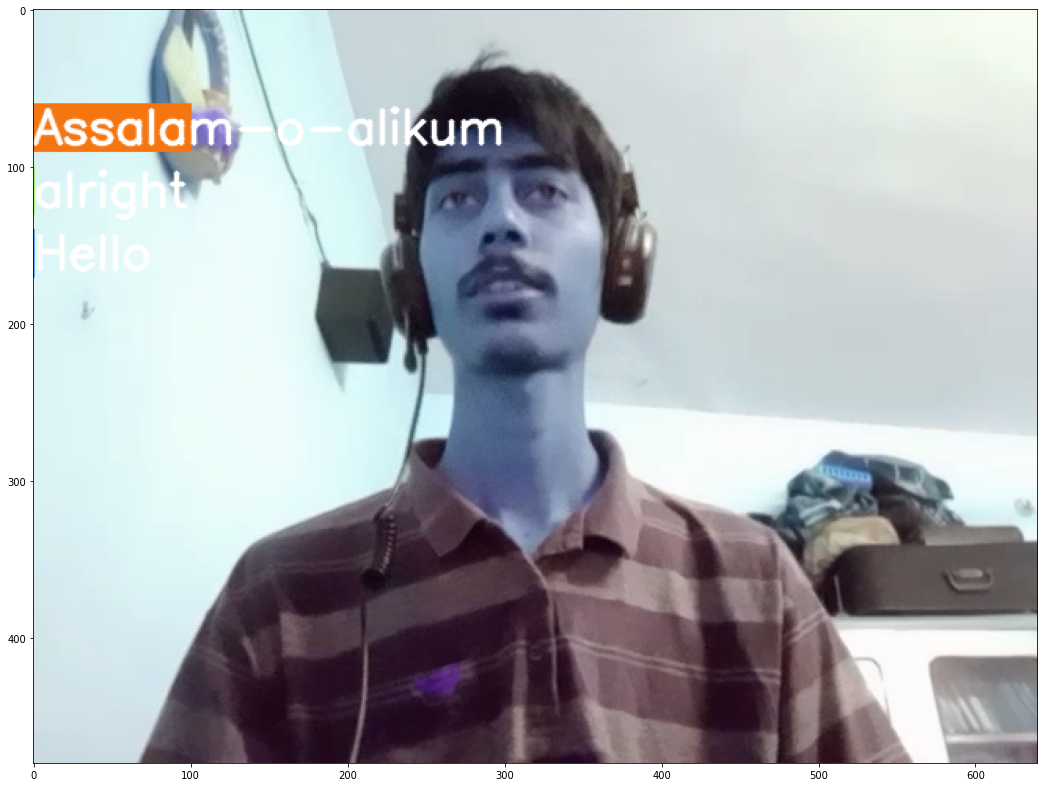

In [80]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [81]:
sequence.reverse()

In [82]:
len(sequence)

15

In [83]:
sequence.append('def')

In [84]:
sequence.reverse()

In [85]:
sequence[-30:]

['def',
 array([ 0.47507328,  0.29844505, -0.90500194, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.47573057,  0.29588515, -0.90579975, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.47655565,  0.2914384 , -0.94837677, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.48541445,  0.29113066, -0.96783084, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.49929148,  0.31194383, -1.01297128, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.49824971,  0.32345521, -0.82325858, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.49493638,  0.3473424 , -0.8265022 , ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.49219543,  0.36756441, -0.83137143, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.51942694,  0.37373397, -0.92692935, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.6247595 ,  0.3765682 , -0.93491173, ...,  0.        ,
         0.       

In [89]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-15:]
        
        if len(sequence) == 15:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Assalam-o-alikum
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Assalam-o-alikum
<class 'mediapipe.python.solution_base.SolutionOutputs

In [ ]:
#cap.release() Use if the Camera is stuck
#cv2.destroyAllWindows()

In [90]:
res[np.argmax(res)] > threshold

True

In [91]:
(num_sequences,15,1662)

NameError: name 'num_sequences' is not defined

In [92]:
model.predict(np.expand_dims(X_test[0], axis=0))

array([[1.0000000e+00, 1.0904426e-12, 1.6504311e-17]], dtype=float32)

In [79]:
#Camera Feed for Initial Setup Run for Test
#Setting Mediapipe Model
sequence=[]
sentence=[]
threshold =0.4

cap= cv2.VideoCapture(0) #Change for a virtual video feed might need to trial and error
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    while cap.isOpened():
        ret, frame = cap.read()
        
        image,results=mediapipe_detection(frame, holistic)
        print(results) #printing results
        
        
        #Draw landmarks
        draw_styled_landmarks(frame, results)
        
        #Prediction Logic
        #keypoints = extract_keypoints(results) #Uncomment to verify the model
        #sequence.insert(0,keypoints)
        #sequence=sequence[:15]
        
        #if len(sequence)==15:
            #res=model.predict(np.expand_dims(sequence,axis=0))[0]
            #print(actions[np.argmax(res)])
            
        cv2.imshow('OpenCv Cam Feed',frame)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Assalam-o-alikum
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Assalam-o-alikum
<class 'mediapipe.python.solution_base.SolutionOutputs